In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

import random
import os
import email
from email import message
import string
import re

# Preprocessing

## Split the dataset into three(3) groups: training set for ham, training set for spam, and the testing set.
Folders 0-70: Train Set
Folders 71-127: Test set

In [2]:
# data folder
path = "data"

# get list of folders
list_folders = [i[0] for i in os.walk(path)]

# for training
training_folders = list_folders[1:72]

# for testing
testing_folders = list_folders[72:]

## Remove stop words

### Open stop words

In [3]:
with open("stop_words.txt") as stop_words:
    stopwords = stop_words.read().splitlines()

In [4]:
def remove_stopwords(word_list):
    global stopwords
    copy_list = word_list.copy()
    for word in copy_list:
        if word in stopwords:
            word_list.remove(word)
    return word_list

## Remove words from the document which may not contribute to the information we want toextract. These includes dropping the alphanumeric characters and punctuation marks.

#### Get the body of the email

In [5]:
def email_body(file):
    message = email.message_from_file(f)
    body = message.get_payload()
    return body

#### Drop alphanumeric characters and punctuation marks

In [6]:
def new_data(body):
    if type(body) == str:
        list_words = body.split()
    else:
        new_body = body[0]
        list_words = new_body.as_string().split()
        
    for i in range(len(list_words)):
        # replace word in the list 
        list_words[i] = re.sub(r'\W+', '', list_words[i].translate(list_words[i].maketrans('', '', string.punctuation)).lower()) 
    
    # Drop emails that are empty
    new_list = [word for word in list_words if len(word) != 0]
    return new_list

# Extract a list of unique words from the training set along with its summed number of occurrences from the spam and ham set

#### Count how many times the words occur and combine dataframes

In [7]:
def count_ocurrences(word_list):
    global count_df

    # make the list of words into a df with its count
    word_df = pd.value_counts(np.array(word_list))
    
    # concatenate the dfs
    count_df = pd.concat([count_df, word_df])

count_df = pd.Series(dtype=int)

In [8]:
for folder in training_folders:
    email_files = os.listdir(folder)
    print(folder)
    for i in range(len(email_files)):
        # determine path of current email file
        file_path = os.path.join(folder, email_files[i])
        # print(file_path)
        f = open(file_path, 'r', encoding='utf-8', errors='replace')
        
        # getting email body and cleaning
        body = email_body(f)
        word_list = new_data(body)
        word_list = remove_stopwords(word_list)
        count_ocurrences(word_list)
        
        f.close()

# get rid of duplicates and make into df
count_df = count_df.rename_axis('Word').reset_index(name="Count")
count_df = count_df.groupby('Word', as_index=False).agg({'Count': 'sum'})

data\000
data\001
data\002
data\003
data\004
data\005
data\006
data\007
data\008
data\009
data\010
data\011
data\012
data\013
data\014
data\015
data\016
data\017
data\018
data\019
data\020
data\021
data\022
data\023
data\024
data\025
data\026
data\027
data\028
data\029
data\030
data\031
data\032
data\033
data\034
data\035
data\036
data\037
data\038
data\039
data\040
data\041
data\042
data\043
data\044
data\045
data\046
data\047
data\048
data\049
data\050
data\051
data\052
data\053
data\054
data\055
data\056
data\057
data\058
data\059
data\060
data\061
data\062
data\063
data\064
data\065
data\066
data\067
data\068
data\069
data\070


In [9]:
count_df

,Word,Count
0,0,2253
1,00,139
2,000,895
3,0000,219
4,00000,6
...,...,...
154604,𝗔𝖻𝗎𝗌𝖾𝗋𝗌,1
154605,𝗔𝗅𝗉𝗁𝖺𝖻𝖾𝗍𝗌,1
154606,𝗔𝗇𝗈𝗇𝗒𝗆𝗈𝗎𝗌,1
154607,𝗠𝖺𝗍𝗁,1


## Extract only the 10000 most common words (common means that these words have the highest frequencies/occurences in the dataset)

#### Ascending order of occurences

In [10]:
sorted_list = count_df.sort_values(by="Count", ascending=False)
sorted_list

,Word,Count
10712,20,14607
40258,bb,14490
137053,td,14268
139676,tr,11699
147426,will,11427
...,...,...
12121,211739,1
12122,211801,1
12123,211839,1
12124,211904,1


#### 1000 most common words

In [11]:
common_words = sorted_list[['Word', 'Count']][:10000].reset_index(drop=True)
common_words = list(common_words.Word)
common_words

['20',
 'bb',
 'td',
 'tr',
 'will',
 'contenttype',
 'contenttransferencoding',
 'textplain',
 '1',
 'br',
 'board',
 '2',
 'price',
 'company',
 '3',
 'email',
 '7bit',
 'body',
 'list',
 'gold',
 'nil',
 'time',
 'help',
 'message',
 'send',
 'dont',
 'html',
 'subject',
 'charsetiso88591',
 'adobe',
 '1998',
 'crustl',
 'received',
 'program',
 'quotedprintable',
 '10',
 'charsetusascii',
 'table',
 'work',
 'font',
 '5',
 'wrote',
 'well',
 'professional',
 'formatflowed',
 'number',
 'a20',
 'ms',
 'good',
 'university',
 'border0',
 'problem',
 'de',
 '0',
 'stock',
 'file',
 'handyboard',
 'size2',
 '8',
 'hb',
 '15',
 'head',
 'office',
 'info',
 '4',
 '1999',
 '6',
 'windows',
 'microsoft',
 'add',
 'current',
 'studies',
 'code',
 'news',
 'development',
 '7',
 'find',
 'corp',
 'pro',
 'div',
 'china',
 'womens',
 'great',
 'meta',
 'best',
 'read',
 'system',
 'people',
 'today',
 'i20',
 'power',
 'call',
 'save',
 'motor',
 'text',
 'address',
 'fax',
 'unsubscribe',
 'i

# Creating the feature matrices

#### Separating spam values and ham values with lists

In [12]:
spam_values = []
ham_values = []

#### Open label files

In [13]:
with open("labels") as labels_file:
    labels = labels_file.read().splitlines()
labels

['ham ../data/000/000',
 'spam ../data/000/001',
 'spam ../data/000/002',
 'ham ../data/000/003',
 'spam ../data/000/004',
 'ham ../data/000/005',
 'ham ../data/000/006',
 'spam ../data/000/007',
 'spam ../data/000/008',
 'spam ../data/000/009',
 'ham ../data/000/010',
 'spam ../data/000/011',
 'spam ../data/000/012',
 'spam ../data/000/013',
 'spam ../data/000/014',
 'spam ../data/000/015',
 'spam ../data/000/016',
 'spam ../data/000/017',
 'spam ../data/000/018',
 'spam ../data/000/019',
 'ham ../data/000/020',
 'ham ../data/000/021',
 'spam ../data/000/022',
 'spam ../data/000/023',
 'ham ../data/000/024',
 'ham ../data/000/025',
 'ham ../data/000/026',
 'ham ../data/000/027',
 'spam ../data/000/028',
 'spam ../data/000/029',
 'spam ../data/000/030',
 'spam ../data/000/031',
 'ham ../data/000/032',
 'spam ../data/000/033',
 'ham ../data/000/034',
 'ham ../data/000/035',
 'spam ../data/000/036',
 'spam ../data/000/037',
 'ham ../data/000/038',
 'ham ../data/000/039',
 'spam ../data/0

#### Determine email if spam or ham

In [14]:
folder_count = 0

for folder in training_folders:
    print(folder)
    email_files = os.listdir(folder)
    for i in range(len(email_files)):
        file_path = os.path.join(folder, email_files[i])
        f = open(file_path, 'r', encoding='utf-8', errors='replace')
        
        # email body 
        body = email_body(f)
        word_list = new_data(body)
        word_list = remove_stopwords(word_list)
        word_list_copy = word_list.copy()
        
        # check if email is spam or ham
        if "spam" in labels[i + (folder_count*300)]:
            label = "spam"
        else:
            label = "ham"

        email_values = []
        
        for word in common_words:
            # check if word is in the email body
            if (word not in word_list):
                value = 0
            else:
                value = 1
            
            email_values.append(value)
        
        for word in word_list_copy:
            if word not in common_words:
                word_list.remove(word)
        
        if label == "spam":
            spam_values.append(email_values)  
        else:
            ham_values.append(email_values) 
   
        f.close()
    
    folder_count = folder_count + 1

data\000
data\001
data\002
data\003
data\004
data\005
data\006
data\007
data\008
data\009
data\010
data\011
data\012
data\013
data\014
data\015
data\016
data\017
data\018
data\019
data\020
data\021
data\022
data\023
data\024
data\025
data\026
data\027
data\028
data\029
data\030
data\031
data\032
data\033
data\034
data\035
data\036
data\037
data\038
data\039
data\040
data\041
data\042
data\043
data\044
data\045
data\046
data\047
data\048
data\049
data\050
data\051
data\052
data\053
data\054
data\055
data\056
data\057
data\058
data\059
data\060
data\061
data\062
data\063
data\064
data\065
data\066
data\067
data\068
data\069
data\070


In [15]:
spam_feature_matrix = pd.DataFrame(spam_values, columns=common_words)
spam_feature_matrix

,20,bb,td,tr,will,contenttype,contenttransferencoding,textplain,1,br,...,classmsonormal,tdif,align3d,translated,wb,eylیzɋâdɋǘvb,eɉăb,vuitton,eɖɘaȃb,恚bb
0,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13772,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13774,0,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
13775,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
ham_feature_matrix = pd.DataFrame(ham_values, columns=common_words)
ham_feature_matrix

,20,bb,td,tr,will,contenttype,contenttransferencoding,textplain,1,br,...,classmsonormal,tdif,align3d,translated,wb,eylیzɋâdɋǘvb,eɉăb,vuitton,eɖɘaȃb,恚bb
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7520,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7521,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Computing Priors

#### Total number of emails

In [17]:
total_emails = len(spam_feature_matrix) + len(ham_feature_matrix)
total_emails

21300

#### Total number of spam

In [18]:
total_spam = len(spam_values)
total_spam

13777

#### Total number of ham

In [19]:
total_ham = len(ham_values)
total_ham

7523

#### Probability for spam

In [20]:
probability_spam = total_spam/total_emails
probability_spam

0.6468075117370892

#### Probability of ham

In [21]:
probability_ham = total_ham/total_emails
probability_ham

0.3531924882629108

# Computing likelihood of each word

In [22]:
# sum up occurrences of each word in spam emails
spam_vector = spam_feature_matrix.sum()
spam_vector

20              1529
bb               988
td               866
tr               870
will            2237
                ... 
eylیzɋâdɋǘvb      24
eɉăb              24
vuitton           22
eɖɘaȃb            24
恚bb               12
Length: 10000, dtype: int64

In [23]:
# sum up occurrences of each word in ham emails
ham_vector = ham_feature_matrix.sum()
ham_vector

20               388
bb                11
td                16
tr                13
will            2304
                ... 
eylیzɋâdɋǘvb       0
eɉăb               0
vuitton            0
eɖɘaȃb             0
恚bb                0
Length: 10000, dtype: int64

In [24]:
# make dataframes that will hold p(c|w) values
prob_spam_words = pd.DataFrame(columns=['Word', 'Probability'])
prob_ham_words = pd.DataFrame(columns=['Word', 'Probability'])

In [25]:
# insert the top 10000 words as rows in each df of each category
prob_spam_words.Word = spam_feature_matrix.columns
prob_ham_words.Word = ham_feature_matrix.columns

In [26]:
# total count of occurrences of all words in each category
total_spam_word = spam_feature_matrix.values.sum()
total_ham_word = ham_feature_matrix.values.sum()

In [27]:
print("Total spam word: ", total_spam_word)
print("Total ham word: ", total_ham_word)

Total spam word:  537167
Total ham word:  377241


#### Laplace smoothng (lambda = 1)

In [28]:
lambda_value = 1

In [29]:
probabilities_spam = []
for i in range(len(spam_vector)):
    probability = (spam_vector[i] + lambda_value) / (total_spam_word + lambda_value * len(spam_vector))
    probabilities_spam.append(probability)
    
# dataframe
prob_spam_words.Probability = probabilities_spam
prob_spam_words

,Word,Probability
0,20,0.002796
1,bb,0.001807
2,td,0.001585
3,tr,0.001592
4,will,0.004090
...,...,...
9995,eylیzɋâdɋǘvb,0.000046
9996,eɉăb,0.000046
9997,vuitton,0.000042
9998,eɖɘaȃb,0.000046


In [30]:
probabilities_ham = []
for i in range(len(ham_vector)):
    probability = (ham_vector[i] + lambda_value) / (total_ham_word + lambda_value * len(ham_vector))
    probabilities_ham.append(probability)

# dataframe
prob_ham_words.Probability = probabilities_ham
prob_ham_words

,Word,Probability
0,20,0.001005
1,bb,0.000031
2,td,0.000044
3,tr,0.000036
4,will,0.005952
...,...,...
9995,eylیzɋâdɋǘvb,0.000003
9996,eɉăb,0.000003
9997,vuitton,0.000003
9998,eɖɘaȃb,0.000003


# Classifying the emails

In [31]:
prob_spam_words_copy = prob_spam_words.copy()
prob_spam_words_copy = prob_spam_words_copy.set_index('Word').to_dict('index')

prob_ham_words_copy = prob_ham_words.copy()
prob_ham_words_copy = prob_ham_words_copy.set_index('Word').to_dict('index')

def classify(file):
    body = email_body(file)
    
    word_list = new_data(body)
    word_list = remove_stopwords(word_list)
    word_list = [x.lower() for x in word_list]
    words = []
    
    for word in word_list:
        if word in common_words:
            words.append(word)
            
    classify_spam = 0
    classify_ham = 0
    
    for word in words:
        prob_word_spam = prob_spam_words_copy[word]['Probability']
        prob_word_ham = prob_ham_words_copy[word]['Probability']
        
        classify_spam = classify_spam + (np.log(probability_spam) + np.log(prob_word_spam))
        classify_ham = classify_ham + (np.log(probability_ham) + np.log(prob_word_ham))
    
    # If P(S | Wd) > P(H | Wd), it is classified as spam
    if classify_spam > classify_ham:
        return "Spam"
    elif classify_ham > classify_spam:
        return "Ham"
    else:
        return "Cannot be opened"

# Testing the classifier

In [32]:
test_classification = []

for folder in testing_folders[:5]:
    email_files = os.listdir(folder)
    print(folder)
    for i in range(len(email_files)):
        file_path = os.path.join(folder, email_files[i])
        f = open(file_path, 'r', encoding='utf-8', errors='replace')
        
        # take note of classification labels
        test_classification.append(classify(f))
        
        f.close()

data\071
data\072
data\073
data\074
data\075


# Performance Evaluation

In [33]:
test_labels = labels[total_emails:]
TP = 0
TN = 0
FP= 0
FN = 0

In [34]:
for i in range(len(test_classification)):
    
    if "spam" in test_labels[i] and test_classification[i] == "Spam":
        TP = TP + 1
        
    elif "ham" in test_labels[i] and test_classification[i] == "Ham":
        TN = TN + 1
    
    elif "ham" in test_labels[i] and test_classification[i] == "Spam":
        FP = FP + 1
        
    elif "spam" in test_labels[i] and test_classification[i] == "Ham":
        FN = FN + 1

print("True positive: ", TP)
print("True negative: ", TN)
print("False positive: ", FP)
print("False negative: ", FN)

True positive:  940
True negative:  475
False positive:  21
False negative:  19


#### Evaluation Functions

In [35]:
acc = (TN + TP) / (TN + TP + FP + FN)
r = TP / (TP + FP)
p = TP / (TP + TN)

print("Accuracy: ", acc)
print("Recall: ", r)
print("Precision: ", p)

Accuracy:  0.9725085910652921
Recall:  0.9781477627471384
Precision:  0.6643109540636042


# Guide Questions:

## 1. What is the effect of removing stop words in terms of precision, recall, and accuracy?
### Show a plot or a table of these results

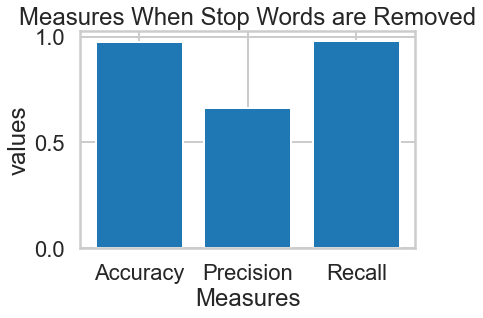

In [36]:
x_axis = ['Accuracy', 'Precision', 'Recall']
y_axis = [acc, p, r]

plt.bar(x_axis, y_axis)
plt.title('Measures When Stop Words are Removed')
plt.xlabel('Measures')
plt.ylabel('values')
plt.show()

## 3. Discuss the results of the different parameters used for Lambda smoothing. Test it on 5 varying values of the λ (e.g. λ = 2.0, 1.0, 0.5, 0.1, 0.005), 
### Evaluate performance metrics for each.

In [37]:
lambda_value = 2
probabilities_spam = []
for i in range(len(spam_vector)):
    probability = (spam_vector[i] + lambda_value) / (total_spam_word + lambda_value * len(spam_vector))
    probabilities_spam.append(probability)
    
prob_spam_words.Probability = probabilities_spam
print(prob_spam_words)

probabilities_ham = []
for i in range(len(ham_vector)):
    probability = (ham_vector[i] + lambda_value) / (total_ham_word + lambda_value * len(ham_vector))
    probabilities_ham.append(probability)
prob_ham_words.Probability = probabilities_ham
print (prob_ham_words)

              Word  Probability
0               20     0.002748
1               bb     0.001777
2               td     0.001558
3               tr     0.001565
4             will     0.004019
...            ...          ...
9995  eylیzɋâdɋǘvb     0.000047
9996          eɉăb     0.000047
9997       vuitton     0.000043
9998        eɖɘaȃb     0.000047
9999           恚bb     0.000025

[10000 rows x 2 columns]
              Word  Probability
0               20     0.000982
1               bb     0.000033
2               td     0.000045
3               tr     0.000038
4             will     0.005805
...            ...          ...
9995  eylیzɋâdɋǘvb     0.000005
9996          eɉăb     0.000005
9997       vuitton     0.000005
9998        eɖɘaȃb     0.000005
9999           恚bb     0.000005

[10000 rows x 2 columns]


In [38]:
lambda_value = 1
probabilities_spam = []
for i in range(len(spam_vector)):
    probability = (spam_vector[i] + lambda_value) / (total_spam_word + lambda_value * len(spam_vector))
    probabilities_spam.append(probability)
    
prob_spam_words.Probability = probabilities_spam
print(prob_spam_words)

probabilities_ham = []
for i in range(len(ham_vector)):
    probability = (ham_vector[i] + lambda_value) / (total_ham_word + lambda_value * len(ham_vector))
    probabilities_ham.append(probability)
prob_ham_words.Probability = probabilities_ham
print (prob_ham_words)

              Word  Probability
0               20     0.002796
1               bb     0.001807
2               td     0.001585
3               tr     0.001592
4             will     0.004090
...            ...          ...
9995  eylیzɋâdɋǘvb     0.000046
9996          eɉăb     0.000046
9997       vuitton     0.000042
9998        eɖɘaȃb     0.000046
9999           恚bb     0.000024

[10000 rows x 2 columns]
              Word  Probability
0               20     0.001005
1               bb     0.000031
2               td     0.000044
3               tr     0.000036
4             will     0.005952
...            ...          ...
9995  eylیzɋâdɋǘvb     0.000003
9996          eɉăb     0.000003
9997       vuitton     0.000003
9998        eɖɘaȃb     0.000003
9999           恚bb     0.000003

[10000 rows x 2 columns]


In [39]:
lambda_value = 0.1
probabilities_spam = []
for i in range(len(spam_vector)):
    probability = (spam_vector[i] + lambda_value) / (total_spam_word + lambda_value * len(spam_vector))
    probabilities_spam.append(probability)
    
prob_spam_words.Probability = probabilities_spam
print(prob_spam_words)

probabilities_ham = []
for i in range(len(ham_vector)):
    probability = (ham_vector[i] + lambda_value) / (total_ham_word + lambda_value * len(ham_vector))
    probabilities_ham.append(probability)
prob_ham_words.Probability = probabilities_ham
print (prob_ham_words)

              Word  Probability
0               20     0.002841
1               bb     0.001836
2               td     0.001609
3               tr     0.001617
4             will     0.004157
...            ...          ...
9995  eylیzɋâdɋǘvb     0.000045
9996          eɉăb     0.000045
9997       vuitton     0.000041
9998        eɖɘaȃb     0.000045
9999           恚bb     0.000022

[10000 rows x 2 columns]
              Word   Probability
0               20  1.026065e-03
1               bb  2.934637e-05
2               td  4.256545e-05
3               tr  3.463400e-05
4             will  6.091619e-03
...            ...           ...
9995  eylیzɋâdɋǘvb  2.643817e-07
9996          eɉăb  2.643817e-07
9997       vuitton  2.643817e-07
9998        eɖɘaȃb  2.643817e-07
9999           恚bb  2.643817e-07

[10000 rows x 2 columns]


In [40]:
lambda_value = 0.005
probabilities_spam = []
for i in range(len(spam_vector)):
    probability = (spam_vector[i] + lambda_value) / (total_spam_word + lambda_value * len(spam_vector))
    probabilities_spam.append(probability)
    
prob_spam_words.Probability = probabilities_spam
print(prob_spam_words)

probabilities_ham = []
for i in range(len(ham_vector)):
    probability = (ham_vector[i] + lambda_value) / (total_ham_word + lambda_value * len(ham_vector))
    probabilities_ham.append(probability)
prob_ham_words.Probability = probabilities_ham
print (prob_ham_words)

              Word  Probability
0               20     0.002846
1               bb     0.001839
2               td     0.001612
3               tr     0.001619
4             will     0.004164
...            ...          ...
9995  eylیzɋâdɋǘvb     0.000045
9996          eɉăb     0.000045
9997       vuitton     0.000041
9998        eɖɘaȃb     0.000045
9999           恚bb     0.000022

[10000 rows x 2 columns]
              Word   Probability
0               20  1.028397e-03
1               bb  2.916847e-05
2               td  4.242084e-05
3               tr  3.446941e-05
4             will  6.106705e-03
...            ...           ...
9995  eylیzɋâdɋǘvb  1.325237e-08
9996          eɉăb  1.325237e-08
9997       vuitton  1.325237e-08
9998        eɖɘaȃb  1.325237e-08
9999           恚bb  1.325237e-08

[10000 rows x 2 columns]


## 4. What are your recommendations to further improve the model?

Since the model takes a while to run, it is recommended to find a way to make it more quick and efficient. It is also recommended to try different folders for testing and training the data and whether there will be changes in the result. 